In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_df = pd.read_csv('BostonHousing.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

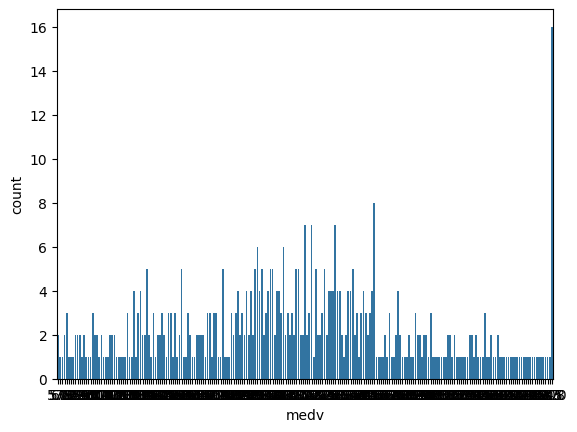

In [4]:
sns.countplot(data=boston_df,x='medv')
plt.show()

In [5]:
X = boston_df.drop('medv',axis=1)
y = boston_df['medv']
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

In [7]:
from sklearn.svm import SVR
svr = SVR(kernel='linear',C=10)
svr.fit(scaled_X_train,y_train)
y_pred = svr.predict(scaled_X_test)
y_pred

array([25.81864582, 33.12915696, 17.06176697, 25.00763785, 18.40656549,
       21.99421335, 17.17619089, 16.68264899, 20.23550491, 20.01010028,
       21.05048018, 17.63805612, -7.84188441, 21.72156768, 17.42944663,
       25.8819819 , 19.30697166,  4.57013818, 40.2531497 , 16.81298474,
       27.01305286, 29.10320464, 11.60990532, 24.73669891, 16.40380366,
       12.71826286, 22.14499363, 14.63066503, 19.09504024, 18.70617909,
       18.75836407, 24.53272088, 24.98384318, 15.07825497, 15.21347033,
       16.98240774, 30.45286732, 19.55190079, 21.59625979, 25.27421386,
       13.9200171 , 29.59436093, 42.37000901, 17.2566359 , 25.52130412,
       15.16345973, 13.37769053, 26.65552073, 18.75802784, 28.35787359,
       19.62538089, 32.45875909, 16.31957576, 26.0373935 , 37.72203355,
       21.99644221, 18.05660434, 32.37093888, 24.28385104, 12.61294893,
       23.63780425, 31.77333812, 30.14606327, 16.00333601, 22.30950464,
       13.11871828, 19.56200767, 25.44295277, 30.47429254, 10.98

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RSME = np.sqrt(MSE)

MAE_percentage = MAE*100/y.mean()
RSME_percnetage = RSME*100/y.mean()

print(f'MAE: {MAE}, percentage: {MAE_percentage}\n RSME: {RSME}, percentage: {RSME_percnetage}')

MAE: 3.1696224027865134, percentage: 14.066700601757432
 RSME: 5.0328074747474, percentage: 22.335466796082862


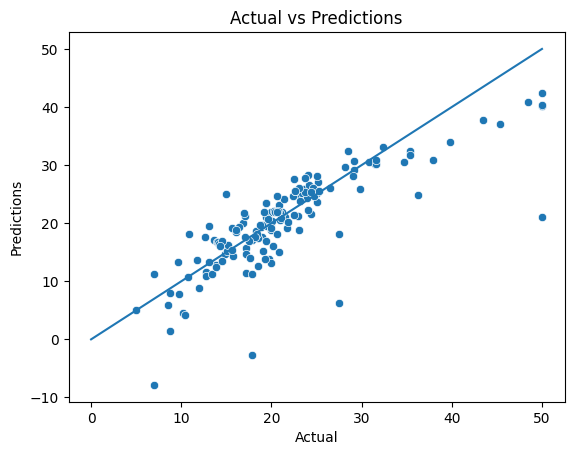

In [9]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Actual vs Predictions')
plt.xlabel('Actual')
plt.ylabel('Predictions')
x_axis = np.linspace(0,50,50)
y_axis = np.linspace(0,50,50)
plt.plot(x_axis,y_axis)
plt.show()

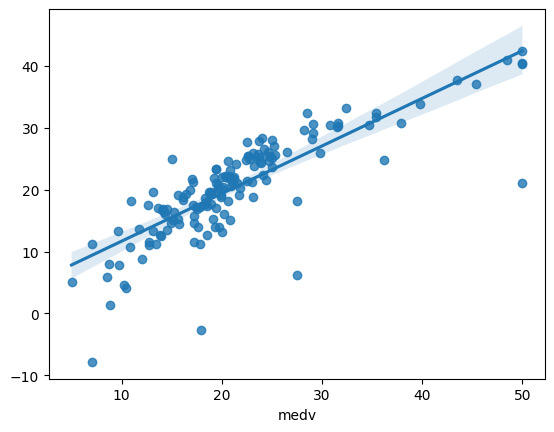

In [10]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

In [12]:
from sklearn.model_selection import GridSearchCV
params = {'kernel': ['linear','kbf','poly','sigmoid'], 'C':[0.1,1,10,100,1000]}
svr = SVR()
grid = GridSearchCV(svr,params,scoring='neg_mean_squared_error')
grid.fit(scaled_X_train,y_train)

C:\Users\yaelg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yaelg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yaelg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\yaelg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'kbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [13]:
svr = SVR(kernel='poly',C=10)
svr.fit(scaled_X_train,y_train)
y_pred = svr.predict(scaled_X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RSME = np.sqrt(MSE)

MAE_percentage = MAE*100/y.mean()
RSME_percnetage = RSME*100/y.mean()

print(f'MAE: {MAE}, percentage: {MAE_percentage}\n RSME: {RSME}, percentage: {RSME_percnetage}')

MAE: 2.778328348351286, percentage: 12.330147911396212
 RSME: 4.0542789764720535, percentage: 17.99278313653223


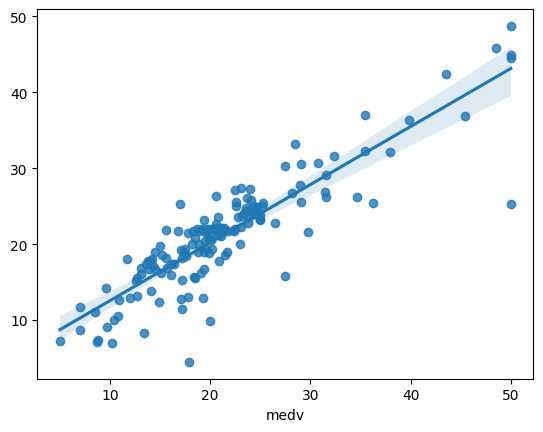

In [15]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [16]:
from joblib import load,dump
dump(scalar,'scalar_boston_housing.joblib')
dump(svr,'svr_model_boston_housing.joblib')

['svr_model_boston_housing.joblib']

In [17]:
loaded_scalar = load('scalar_boston_housing.joblib')
loaded_model = ('svr_model_boston_housing.joblib')